In [1]:
import pandas as pd
import nltk
df = pd.read_csv("./Post_Data/Training_data_augmented_2.csv")
df.head()

,label,text
0,SH16,gaine compléter rappel
1,CAR23,métallique toit cabine correctement
2,CAR26,plaque identification complète correcte charge...
3,CAR01,bon fonctionnement système appel secours cabin...
4,CAR06,donnée propriétaire placer cabine


In [2]:
from io import StringIO
col = ['label', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]
df.columns = ['label', 'text']
df['label_id'] = df['label'].factorize()[0]
label_id_df = df[['label', 'label_id']].drop_duplicates().sort_values('label_id')
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id', 'label']].values)
df.head()

,label,text,label_id
0,SH16,gaine compléter rappel,0
1,CAR23,métallique toit cabine correctement,1
2,CAR26,plaque identification complète correcte charge...,2
3,CAR01,bon fonctionnement système appel secours cabin...,3
4,CAR06,donnée propriétaire placer cabine,4


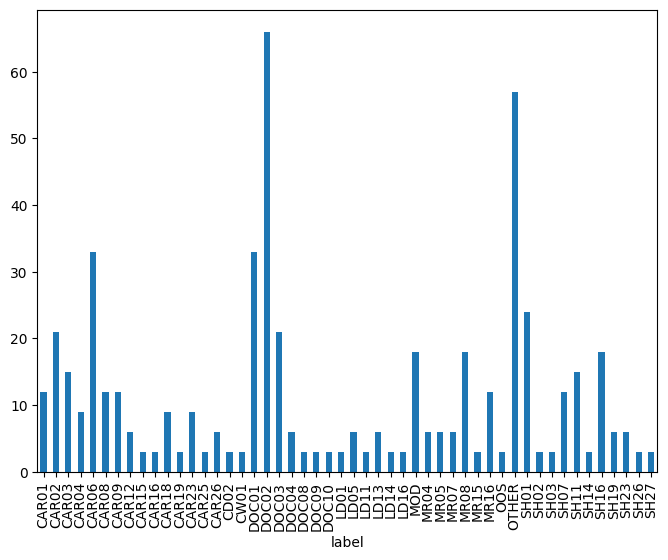

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.text).toarray()
labels = df.label_id
features.shape

(546, 698)

In [5]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for text, label_id in sorted(label_to_id.items()):
  features_chi2 = chi2(features, labels == label_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(text))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'CAR01':
  . Most correlated unigrams:
. bon
. système
  . Most correlated bigrams:
. appel secours
. bon fonctionnement
# 'CAR02':
  . Most correlated unigrams:
. tension
. sans
  . Most correlated bigrams:
. sans tension
. installation sans
# 'CAR03':
  . Most correlated unigrams:
. faible
. secours
  . Most correlated bigrams:
. secours défectueux
. éclairage secours
# 'CAR04':
  . Most correlated unigrams:
. illisible
. plaquette
  . Most correlated bigrams:
. degré rappel
. inscription réglementaires
# 'CAR06':
  . Most correlated unigrams:
. donnée
. propriétaire
  . Most correlated bigrams:
. contacter absent
. donnée propriétaire
# 'CAR08':
  . Most correlated unigrams:
. assez
. lampe
  . Most correlated bigrams:
. éclairage cabine
. lampe cabine
# 'CAR09':
  . Most correlated unigrams:
. commande
. montée
  . Most correlated bigrams:
. révision toit
. inspection fonctionne
# 'CAR12':
  . Most correlated unigrams:
. sonnerie
. alarme
  . Most correlated bigrams:
. dossier sé

/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/de

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [7]:
print(clf.predict(count_vect.transform([" "])))

['DOC02']


/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


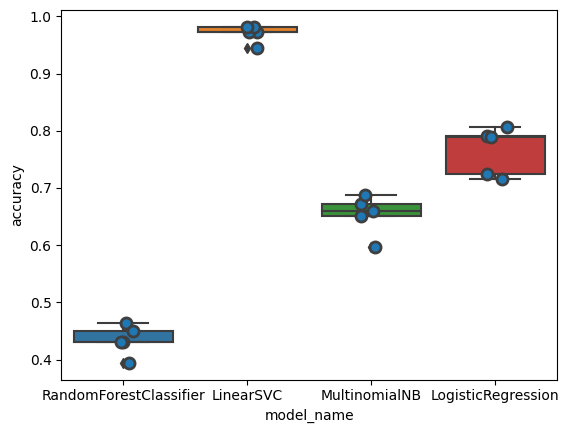

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [9]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.970692
LogisticRegression        0.765521
MultinomialNB             0.653812
RandomForestClassifier    0.434012
Name: accuracy, dtype: float64

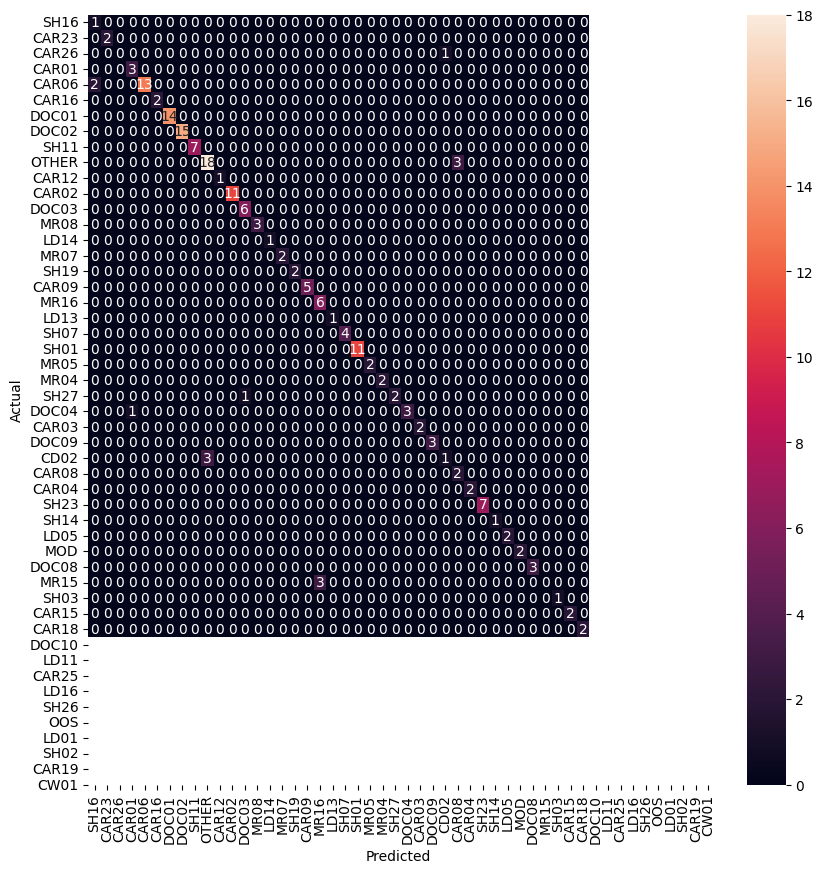

In [10]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
model.fit(features, labels)

LinearSVC()

In [12]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for label, label_id in sorted(label_to_id.items()):
  indices = np.argsort(model.coef_[label_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(label))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'CAR01':
  . Top unigrams:
       . système
       . fonctionnement
  . Top bigrams:
       . fonctionnement système
       . bon fonctionnement
# 'CAR02':
  . Top unigrams:
       . sans
       . appel
  . Top bigrams:
       . pendant sans
       . sans appel
# 'CAR03':
  . Top unigrams:
       . secours
       . faible
  . Top bigrams:
       . éclairage secours
       . tension éclairage
# 'CAR04':
  . Top unigrams:
       . illisible
       . plaquette
  . Top bigrams:
       . inscription réglementaires
       . identification nom
# 'CAR06':
  . Top unigrams:
       . propriétaire
       . donnée
  . Top bigrams:
       . compléter rappel
       . bâtiment cabine
# 'CAR08':
  . Top unigrams:
       . remplacer
       . lampe
  . Top bigrams:
       . lampe cabine
       . défectueux remédier
# 'CAR09':
  . Top unigrams:
       . commande
       . révision
  . Top bigrams:
       . monté boîtier
       . révision toit
# 'CAR12':
  . Top unigrams:
       . alarme
       . sonneri

/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
texts = ["Changé le battery"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_label[predicted]))
  print("")

"Changé le battery"
  - Predicted as: 'OTHER'



In [ ]:
import pandas as pd
import numpy as np

text = pd.read_csv('./Post_Data/Testing_data.csv')
text = text[['text']].to_numpy().reshape(-1)
text = roberta_encode(text, tokenizer)

loaded_model= model.load_weights('./Post_Data/model.h5')
y_pred = model.predict(text)
y_pred_max = [np.argmax(i) for i in y_pred]

y_pred_fin = [category_to_name[i] for i in y_pred_max]

df = pd.DataFrame(y_pred_fin)
df.to_csv('./Post_Data/Output.csv', index=False)
